<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.random.normal(loc=5, scale=2, size=10)

array([3.01530431, 5.08976122, 1.60311589, 5.08671266, 2.82843243,
       6.87928559, 2.22450542, 4.30360013, 0.85659278, 5.2497666 ])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

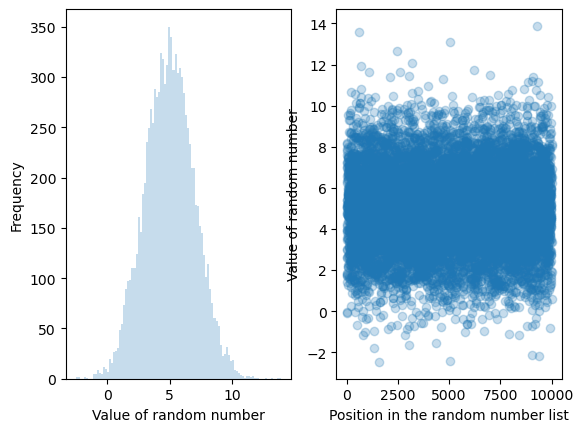

In [3]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [4]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.48%


## 1 Brownian Motion in 1D

### 1.1 The scenario

### 1.2 The simulation

In [7]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    step_size = 1    
    x = 0                               

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   
            x += step_size
        else:
            x -= step_size

    return x

In [5]:
import numpy.random as rnd

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

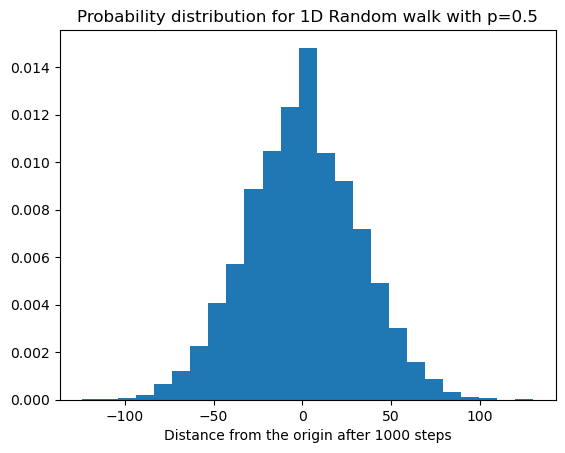

In [8]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

In [9]:
def normal(x, m=0, s=1):
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

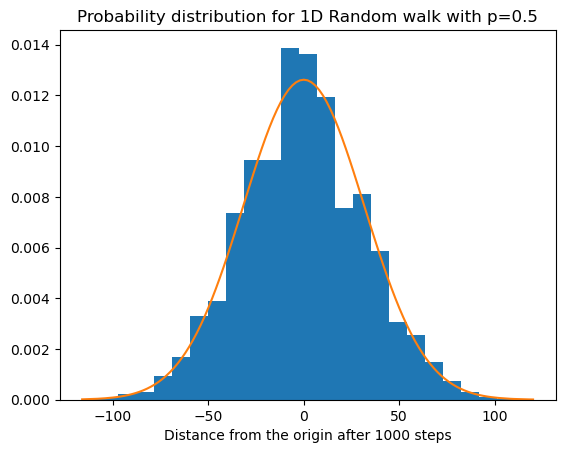

In [10]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

prob_right = .5
prob_left = 1 - prob_right                      
mean = no_of_steps * (prob_right - prob_left)    
sd = np.sqrt(4*no_of_steps*prob_right*prob_left)
x = np.unique(results)                           

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

In [ ]:

# Your code here


### 2.2 A poor but intuitive solution

In [ ]:
N_total = 100_000                        
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   

    if r <= 1:
        N_green += 1                          

4 * N_green / N_total   

### 2.3 A better solution

In [ ]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)              

4 * (N_green / N_total)

### 2.4 A smarter solution

In [ ]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

## Exercise 1 :  Vital Stats of Random π

mean = 3.1389880000000003, standard deviation = 0.016821648432897403


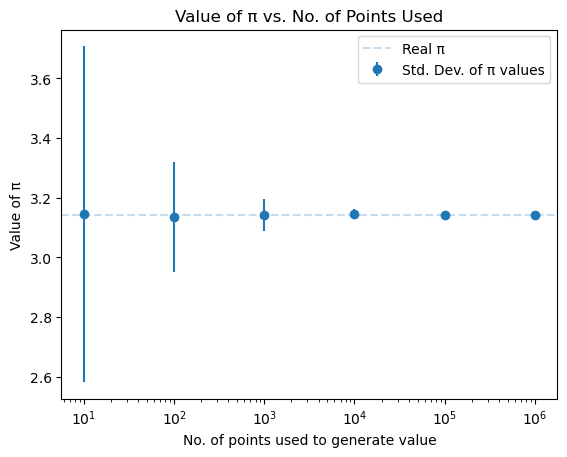

In [5]:
import numpy.random as rnd
from matplotlib import pyplot as plt


def estimate_pi(n):
    x=rnd.uniform(low=-1, high=1, size=n)
    y=rnd.uniform(low=-1, high=1, size=n)
    n_green= np.sum((x**2+y**2) <= 1)                
    return 4 * (n_green / n)

n10000 = [estimate_pi(10000) for n in range(100)]

mean = np.mean(n10000)
std = np.std(n10000)

print(f'mean = {mean}, standard deviation = {std}')

ns = [10**i for i in range(1, 7)]
means = []
std_devs = []

for n in ns:
    est = [estimate_pi(n) for _ in range(100)]
    mean = np.mean(est)
    std_dev = np.std(est)
    means.append(mean)
    std_devs.append(std_dev)

y_line = np.linspace(np.pi, np.pi)
plt.errorbar(ns, means, yerr=std_devs, fmt='o', label='Std. Dev. of π values')
plt.axhline(y=np.pi, linestyle='--', alpha = .25, label = 'Real π')
plt.xscale('log')
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of π')
plt.legend()
plt.title('Value of π vs. No. of Points Used')
plt.show()
